<a href="https://colab.research.google.com/github/madicodes231/Homework1/blob/main/Copy1_of_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUBSCRIBE to the [channel](https://www.youtube.com/user/19daredevill?sub_confirmation=1) to learn cool things**

# Clone Repository

In [3]:
!git clone https://github.com/misbah4064/face_recognition.git
%cd face_recognition

Cloning into 'face_recognition'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 5), reused 23 (delta 3), pack-reused 0
Receiving objects: 100% (26/26), 3.03 MiB | 9.38 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/face_recognition


# Install Face Recognition from pip

In [2]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=3c6946cf5da11fa64f5d473bdc5578ff686f2f846fc1bb87c1cef2eeda809f4c
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


# Passing images to train

In [4]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display


# face_1 = face_recognition.load_image_file("elon.jpg")
# face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_1 = face_recognition.load_image_file("Aaron Peirsol.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("Adam Sandler.jpg")
face_2_encoding = face_recognition.face_encodings(face_1)[0]

face_3 = face_recognition.load_image_file("Adam Scott.jpg")
face_3_encoding = face_recognition.face_encodings(face_1)[0]

face_4 = face_recognition.load_image_file("Ben Affleck.jpg")
face_4_encoding = face_recognition.face_encodings(face_1)[0]

face_5 = face_recognition.load_image_file("Donald Trump.jpg")
face_5_encoding = face_recognition.face_encodings(face_1)[0]

face_6 = face_recognition.load_image_file("Mike Pence.jpg")
face_6_encoding = face_recognition.face_encodings(face_2)[0]

known_face_encodings = [
    face_1_encoding,
    face_2_encoding,
    face_3_encoding,
    face_4_encoding,
    face_5_encoding,
    face_6_encoding
]
known_face_names = [
    "Aaron Peirsol",
    "Adam Sandler","Adam Scott",
    "Ben Affleck","Donald Trump",
    "Mike Pence"
]
print("Done learning and creating profiles")

Done learning and creating profiles


# Testing Face Recognition using Images

Aaron Peirsol


<ipython-input-5-3b5e638e82f3>:25: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)


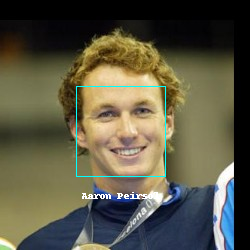

In [5]:
unknown_image1 = face_recognition.load_image_file("Aaron_Peirsol_0003.jpg")

face_locations = face_recognition.face_locations(unknown_image1)
face_encodings = face_recognition.face_encodings(unknown_image1, face_locations)

pil_image = Image.fromarray(unknown_image1)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    print(name)

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    # draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height + 25), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

# Face Recognition in Videos

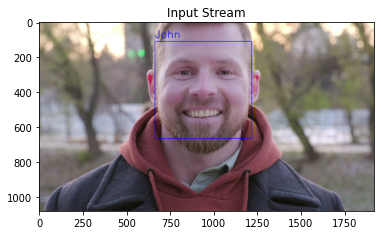

In [ ]:
# Loading video for face detection
%pylab inline
import cv2
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

video_capture = cv2.VideoCapture("video.mp4")
ret, frame = video_capture.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
frame_count = 0

while video_capture.isOpened():
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break

    # We will search face in every 5 frames to speed up process.
    frame_count += 1
    if frame_count % 5 == 0:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display video frame
        title("Input Stream")
        # plt.imshow(frame)

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

        for (face_location,face_encoding) in zip(face_locations,face_encodings):
          matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

          name = "Unknown"

          face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
          best_match_index = np.argmin(face_distances)
          if matches[best_match_index]:
            name = known_face_names[best_match_index]
          # print(name)
          color = (0,0,)
          start_point = (face_location[3],face_location[0])
          end_point = (face_location[1],face_location[2])
          frame = cv2.rectangle(frame, start_point, end_point, color, 2)
          frame = cv2.putText(frame,name,(face_location[3]-0, face_location[0]-20),cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2, cv2.LINE_AA)
          frame_copy = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
          out.write(frame_copy)
          plt.imshow(frame)



        # Show frame...
        plt.show()
        # ... and hold it until a new frame appears
        clear_output(wait=True)
out.release()